##  Step 2:
#### Prepare Input Data For Coregistration

Create Coregistration Input File

The create_coregistration_input_data_example.run_it() function call will generate an input file example coregistration_input_data_example.csv. The input file has five columns. They are 
* index
* lon
* lat
* age
* plate id

There are many ways to get data to prepare the coregistration input file. As examples, we are going to show you how to extract data from EarthChem and Mineral Resources Data System (MRDS) later.

#### Example 1: Use ../data/CopperDeposits/XYBer14_t2_ANDES.shp data

In [1]:
import create_coregistration_input_data_example

#this is the simplest example. 
#we just load in data from a shape file and write out the five-column data to a csv file.
#run the example script to create an example coregistration input file.
#the example input file will be used later in coregistration step.
create_coregistration_input_data_example.run_it()

import pandas as pd

data = pd.read_csv("coregistration_input_data_example.csv", 
                   header=None, names=['index', 'lon', 'lat', 'age', 'plate id']) 
data.head()#let's print the first 5 rows

The data have been written into coregistration_input_data_example.csv successfully!


,index,lon,lat,age,plate id
0,0,-66.28,-27.37,6,201
1,1,-69.37,-31.30,230,201
2,2,-69.75,-30.50,12,201
3,3,-66.65,-27.27,9,201
4,4,-66.61,-27.33,8,201


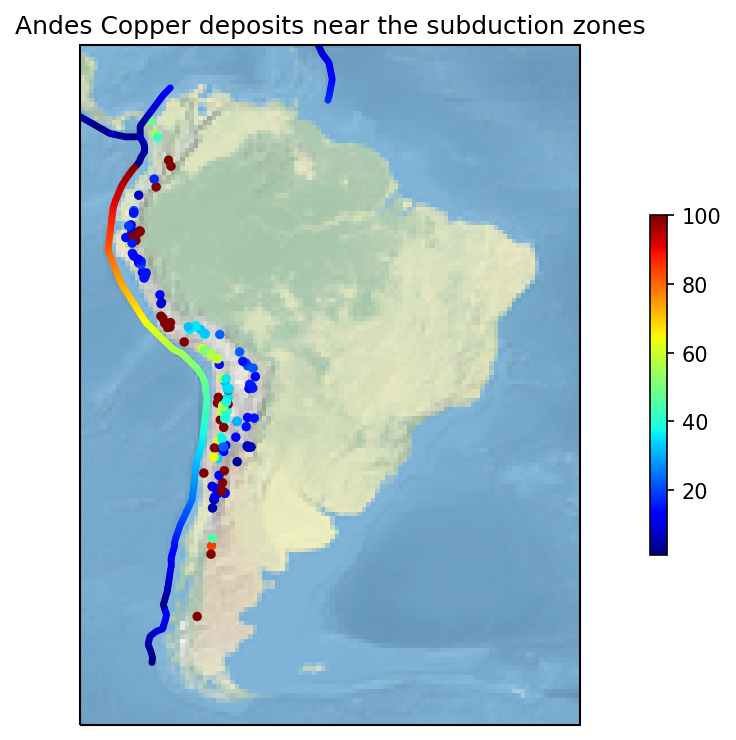

In [2]:
#Now, let's plot a map
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

trench_file = './convergence_data/subStats_0.00.csv'
trench_data= np.genfromtxt(trench_file)

fig = plt.figure(figsize=(12,6),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-85, -30, -55, 15])
#ax.set_extent([-180, 180, -90, 90])
data=data[:155]
cb = ax.scatter(data['lon'], data['lat'], 50, marker='.',c=data['age'], vmin=1, vmax=100, cmap=plt.cm.jet)
ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', c=trench_data[:,11], cmap=plt.cm.jet)
plt.title('Andes Copper deposits near the subduction zones')
fig.colorbar(cb, shrink=0.5)
plt.show()

#### Example 2: Extract Data From EarthChem Data

After generating the subduction convergence kinematics statistics, the sample points of trenches can be used to extract data from EarthChem data.

    Example: python extract_earth_chem.py EarthChem_all.csv output CU 5
    
This command line will extract data from locations which are within 5 degrees of a trench sample point and with a variable name CU. A shafefile(output.shp) and a csv file(output.csv) will be created for the extracted data.

For more information about the usage of extract_earth_chem.py, run "python extract_earth_chem.py -h" in a shell.

The EarthChem_all.csv can be found here https://www.earthbyte.org/webdav/ftp/earthbyte/EarthChem/EarthChem_all.csv.

The following code cell will call extract_earth_chem.py and draw the deposits on a map.

loading data...


/home/mchin/anaconda3/envs/machine_learning/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (2,5,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


query data...
44160
saving file...


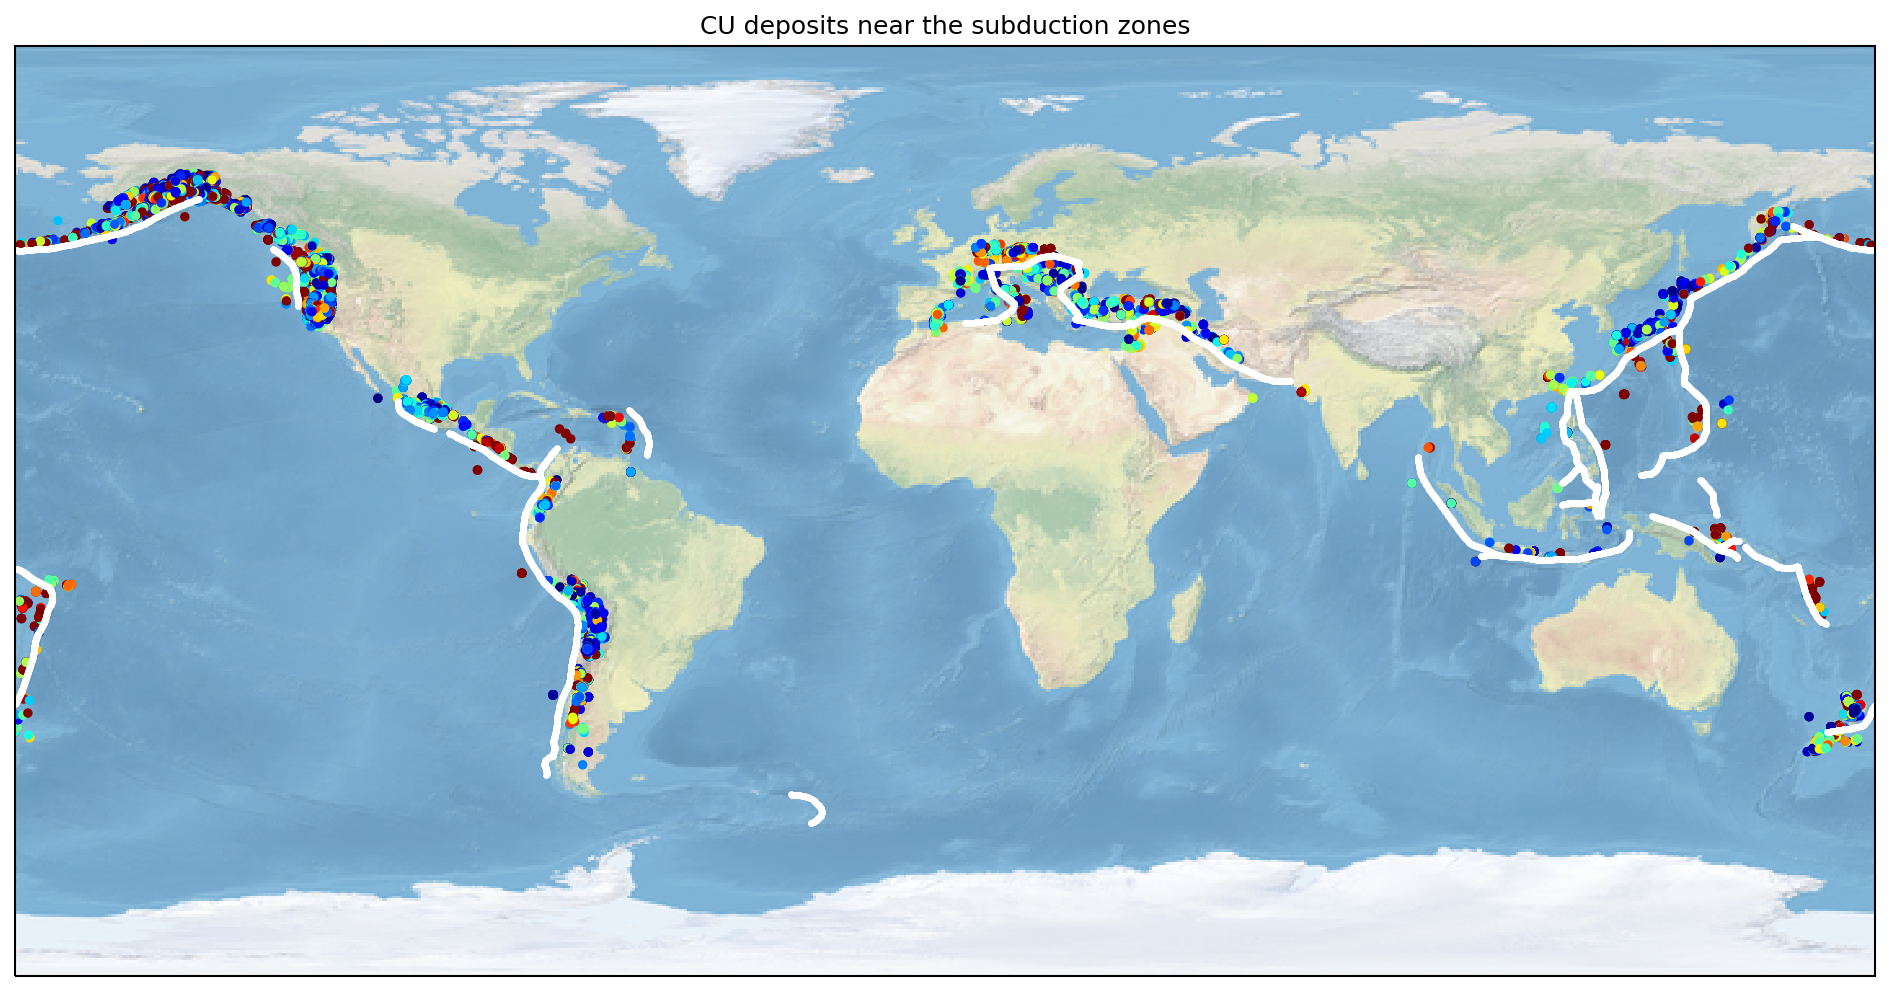

In [3]:
%matplotlib inline

import requests, os
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

import extract_earth_chem

earth_chem_file = 'EarthChem_all.csv'
#if EarthChem_all.csv does not exist, download it.
if not os.path.isfile(earth_chem_file):
    if os.path.isfile('/data/EarthChem_all.csv'):
        earth_chem_file = '/data/EarthChem_all.csv'
    else:
        print(f'downloading {earth_chem_file}')
        myfile = requests.get('https://www.earthbyte.org/webdav/ftp/earthbyte/EarthChem/EarthChem_all.csv')
        open(earth_chem_file, 'wb').write(myfile.content)

#available mineral symbols 
#SIO2,U234_U238,TIO2,AL2O3,FE2O3,TH230_TH232,FE2O3T,TH232_TH230,FEO,FEOT,MGO,RA228_RA226,CAO,NA2O,K2O,
#P2O5,MNO,U238_ACTIVITY,LOI,H2O_PLUS,TH230,H2O_MINUS,H2O,RA226,CR2O3,NIO,LA,CE,CACO3,PR,SM,EU,GD,TB,DY,
#HO,ER,TM,YB,U234_U238_ACTIVITY,LU,LI,BE,B,C,CO2,F,CL,K,CA,MG,SC,TI,V,FE,CR,MN,CO,NI,CU,ZN,GA,ZR,GER,SR,
#K40_AR36,BI,OS187_OS188,NB,TH232_U238,PB208_PB206,CD,PO210_TH230,U238_PB204,BA,AR40_AR36,W,AR37_AR39,AU,
#XE129_XE132,LU176_HF177,HG,OS186_OS188,PB206_PB208,TA,PB210_U238,SB,SR87_SR86,SE,PB207_PB204,PB206_PB204,
#PB208_PB204,SN,S,TH230_U238,ND143_ND144,U,RA226_TH230,I,P,Y,EPSILON_ND,MO,OS184_OS188,PD,RA226_TH228,TE,
#TH232_PB204,HF,OS187_OS186,CL36_CL,RA228_TH232,PB206_PB207,PB,INDIUM,H,PB210_RA226,AR38_AR36,AR40_AR39,D18O,
#AG,TH,U235_PB204,NE21_NE22,TL,NE20_NE22,AS,HF176_HF177,RB,AL,BE10_BE9,AR36_AR39,ND,CS,quartz
extract_earth_chem.main(
    earth_chem_file, #input file
    'EarthChem_CU', #output file
    'CU', #mineral symbol, see above list
    5 #region of interest (in degrees)
)

data=np.genfromtxt('EarthChem_CU.csv', delimiter=',', skip_header=1)
trench_file = './convergence_data/subStats_0.00.csv'
if os.path.isfile(trench_file):
    trench_data= np.genfromtxt(trench_file)
else:
    raise Exception(f'\nERROR: unable to open file {trench_file}. \nRun Step 1 Generate Subduction Convergence Kinematics Statistics first!')
    
    
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-180, 180, -90, 90])
cb = ax.scatter(data[:,1], data[:,0], 50, marker='.',c=data[:,3], vmin=1, vmax=100, cmap=plt.cm.jet)
ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', color='white')
plt.title('CU deposits near the subduction zones')
#fig.colorbar(cb, shrink=0.5)
plt.show()

#### Example 3: Extract Data From Mineral Resources Data System (MRDS)
The file mrds.csv can be found at [https://mrdata.usgs.gov/mrds/mrds-csv.zip](https://mrdata.usgs.gov/mrds/mrds-csv.zip)

loading data...


/home/mchin/anaconda3/envs/machine_learning/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (3,17,25,26,28,34,35,37,39,41,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


query data...
9627
saving file...


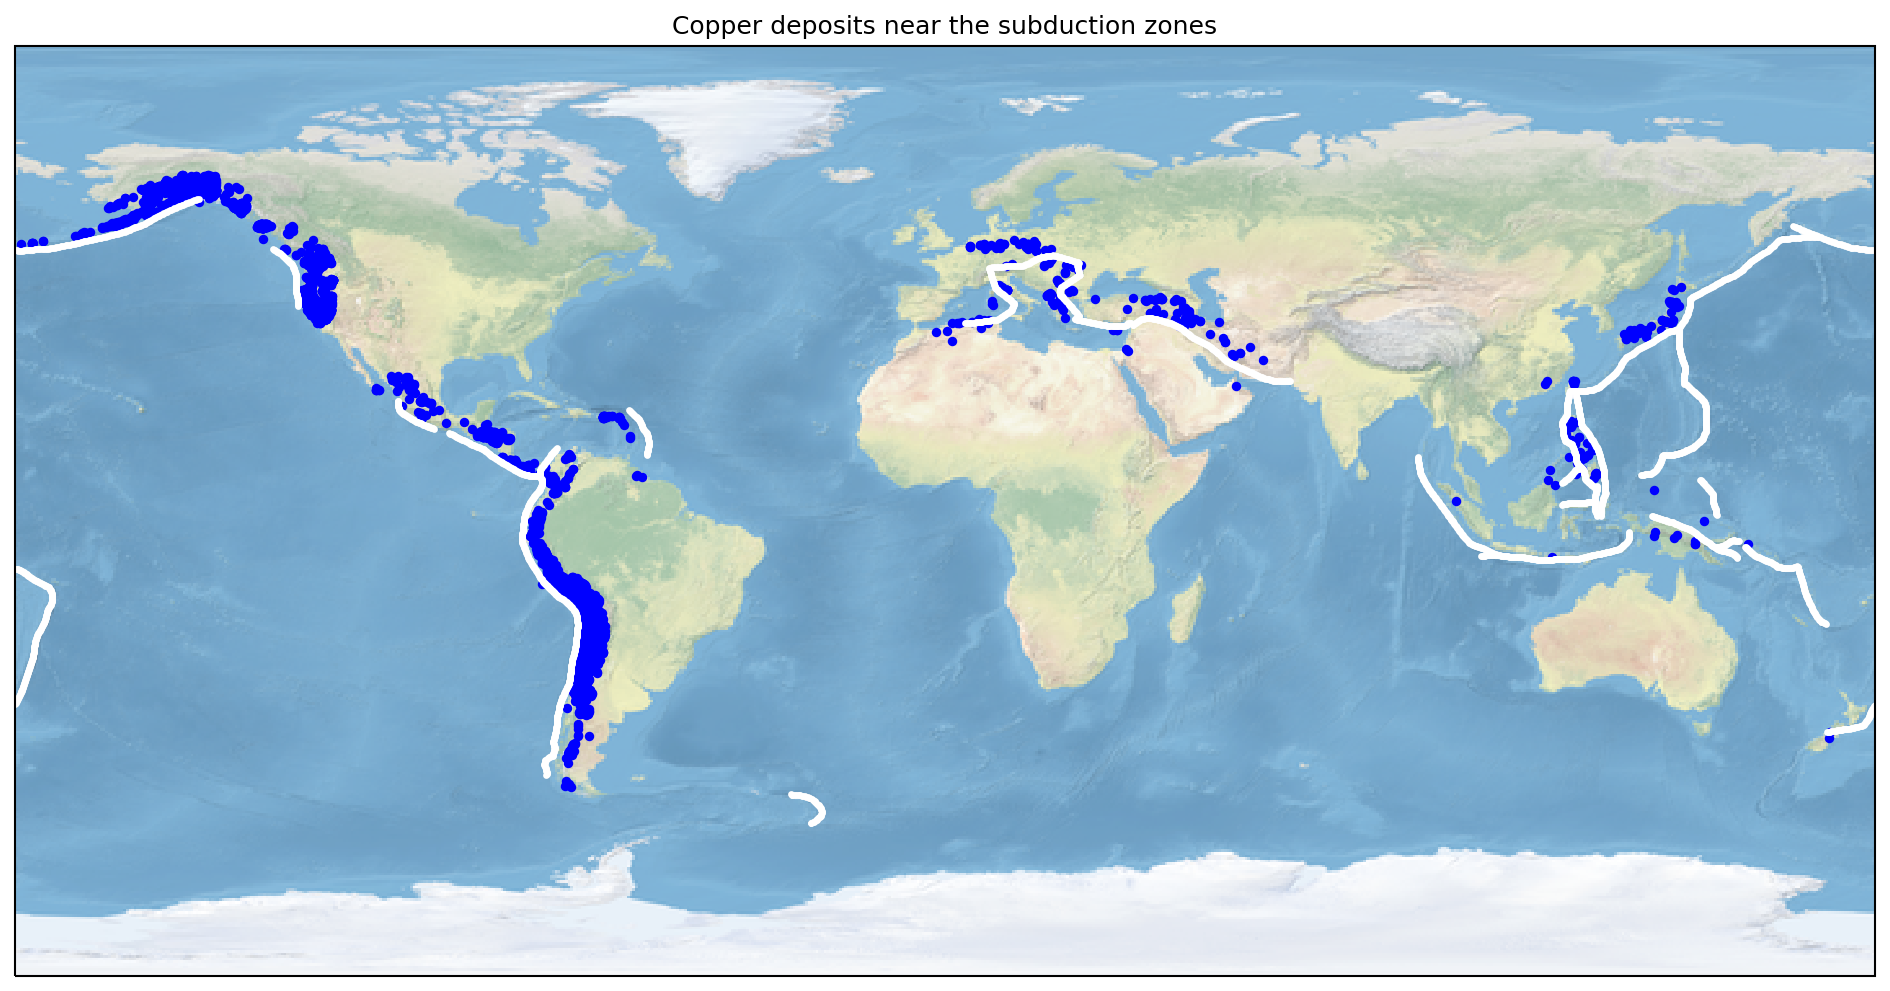

In [4]:
%matplotlib inline

import requests, os

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

import extract_data_from_mrds

mrds_file = 'mrds.csv'
#if mrds.csv does not exist, download it.
if not os.path.isfile(mrds_file):
    if os.path.isfile('/data/mrds.csv'):
        earth_chem_file = '/data/mrds.csv'
    else:
        print(f'downloading {mrds_file}')
        myfile = requests.get('https://www.earthbyte.org/webdav/ftp/earthbyte/MRDS/mrds.csv')
        open(mrds_file, 'wb').write(myfile.content)

#available mineral names 
#'Graphite', 'Sulfur-Pyrite', 'Gold', 'Fluorine-Fluorite', 'Vermiculite', 'Refiner', 
#'Sulfur', 'Mercury', 'Refinery', 'Gallium', 'Limestone', 'Arsenic', 'Osmium', 'Cadmium', 
#'Copper Sulfide', 'Lead', 'Iron-Pyrite', 'Palladium', 'Silica', 'PGE', 'Smelter', 'Construction', 
#'Boron-Borates', 'Bismuth', 'Asbestos', 'Ruthenium', 'Copper', 'Radium', 'Uranium', 'Wollastonite', 
#'Indium', 'Iron', 'Corundum', 'Pyrite', 'Titanium', 'Feldspar', 'Rhodium', 'Mica', 'Strontium', 
#'Barium-Barite', 'Gilsonite', 'Nickel', 'Free', 'Iridium', 'Coal', 'Garnet', 'Selenium', 'Copper Oxide', 
#'General', 'Thorium', 'Rhenium', 'Sand and Gravel', 'Niobium (Columbium)', 'Tellurium', 'Tungsten', 
#'Talc-Soapstone', 'Quartz', 'Stone', 'Nickel Laterite', 'Magnesite', 'Water', 'Gemstone', 'Perlite', 
#'Germanium', 'Calcium', 'Zinc', 'Platinum', 'Molybdenum', 'Zirconium', 'Crushed/Broken', 'Pig Iron', 
#'Chromium', 'Clay', 'Silver', 'Salt', 'Kaolin', 'Dimension', 'Tin', 'Aluminum', 'REE', 'Gypsum-Anhydrite', 
#'Semiprecious Gemstone', 'Metal', 'Emery', 'Beryllium', 'Tantalum', 'Rubidium', 'Antimony', 
#'Phosphorus-Phosphates', 'Lithium', 'Manganese', 'Sulfuric Acid', 'Cobalt', 'Vanadium'
extract_data_from_mrds.main(
    mrds_file, #input file
    'mrds_copper', #output file
    'Copper', #mineral name, see above list
    5 #region of interest (in degrees)
)

data=np.genfromtxt('mrds_copper.csv', delimiter='\t', skip_header=1)
trench_file = './convergence_data/subStats_0.00.csv'
if os.path.isfile(trench_file):
    trench_data= np.genfromtxt(trench_file)
else:
    raise Exception(f'\nERROR: unable to open file {trench_file}. \nRun Step 1 Generate Subduction Convergence Kinematics Statistics first!')
    
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-180, 180, -90, 90])
cb = ax.scatter(data[:,0], data[:,1], 50, marker='.',c='blue')
ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', color='white')
plt.title('Copper deposits near the subduction zones')
#fig.colorbar(cb, shrink=0.5)
plt.show()

#### This is the end of step 2 and now open the step 3 notebook
[3_Coregistration.ipynb](3_Coregistration.ipynb)